# JFruit2 Exploratory data analysis

This tutorial will briefly introduce the JFruit2 simulation model.

# Google Colab setup (optional)

When running this notebook in Google Colab, execute the following first (also ensure that you restart the Google Colab session after the setup):

In [ ]:
! pip install poetry
! poetry config virtualenvs.create false
! poetry self update 1.8.5
! rm -f pyproject.toml
! wget https://raw.githubusercontent.com/Plant-Food-Research-Open/calisim-examples-workshop-material/refs/heads/main/pyproject.toml
! poetry install --no-root
! rm -rf calisim-examples-workshop-material
! git clone --depth 1 https://github.com/Plant-Food-Research-Open/calisim-examples-workshop-material.git
! mv calisim-examples-workshop-material/workshop/jfruit2/* .

# Imports

We will first import all required dependencies.

In [3]:
import pandas as pd
import numpy as np
from jfruit2 import JFruit2
import os.path as osp

# Data

For JFruit2, we have generated synthetic data for demonstration purposes. This time series data are composed of important variables for modelling fruit properties such as weight, soluble content, volume, and carbohydrates.  It was provided to us by French collaborators at INRAE Avingon. 

In [4]:
observed_data = JFruit2.get_observed_data()
observed_data

,age_d,age_h,pip,piv,pp,pv,sfstone,af,ctcs,pif,...,w,s,pf1,pf2,pf,v,dD,mSol,mSta,mSyn
0,2,1,13.778,13.778,9.8344,9.8344,0.0,0.57664,0.000267,11.961,...,0.033638,0.010665,0.98543,4.7757,0.98543,0.040303,-0.37917,0.000646,0.000103,0.004049
1,2,2,13.774,13.774,9.8308,9.8308,0.0,0.58355,0.000264,11.876,...,0.034391,0.010694,0.98872,5.1422,0.98872,0.041074,-0.74167,0.000654,0.000103,0.004054
2,2,3,13.774,13.774,9.8304,9.8304,0.0,0.59076,0.000261,11.804,...,0.035182,0.010724,0.98789,5.0852,0.98789,0.041885,-1.08540,0.000661,0.000103,0.004059
3,2,4,13.771,13.771,9.8273,9.8273,0.0,0.59815,0.000258,11.716,...,0.036000,0.010754,0.98967,5.3017,0.98967,0.042721,-1.41250,0.000668,0.000103,0.004064
4,2,5,13.767,13.767,9.8238,9.8238,0.0,0.60613,0.000254,11.619,...,0.036889,0.010784,0.99307,5.6945,0.99307,0.043629,-1.70830,0.000676,0.000103,0.004070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,159,20,13.827,13.827,9.8834,9.8834,0.0,194.40000,0.000611,20.593,...,190.860000,39.733000,0.94875,10.3730,0.94875,215.700000,-3046.20000,8.391700,1.092500,7.243600
3788,159,21,13.821,13.821,9.8781,9.8781,0.0,194.45000,0.000610,20.527,...,190.940000,39.733000,0.94891,12.5310,0.94891,215.780000,-3047.00000,8.392100,1.092100,7.243600
3789,159,22,13.817,13.817,9.8737,9.8737,0.0,194.50000,0.000610,20.470,...,191.030000,39.733000,0.94898,13.5650,0.94898,215.870000,-3047.80000,8.392600,1.091700,7.243600
3790,159,23,13.814,13.814,9.8711,9.8711,0.0,194.56000,0.000610,20.433,...,191.130000,39.733000,0.94902,14.1340,0.94902,215.970000,-3048.50000,8.393100,1.091300,7.243600


We will plot the relationship between pre-harvest age-in-days against fruit water mass (w). 

<Axes: xlabel='age_d', ylabel='w'>

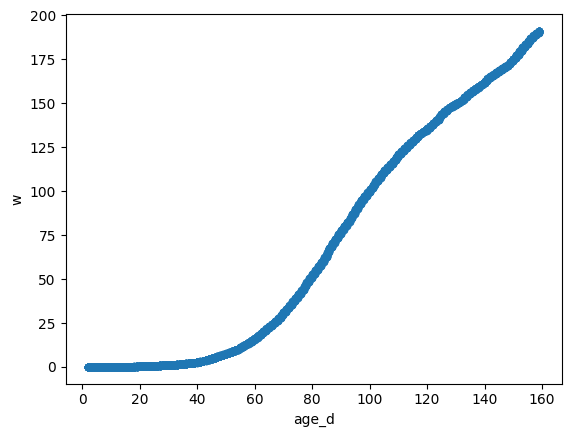

In [5]:
observed_data.plot.scatter("age_d", "w")

Water mass appears to steadily increase over time.

We can next visualise the carbon-content in soluble sugar (mSol) against water mass.

<Axes: xlabel='mSol', ylabel='w'>

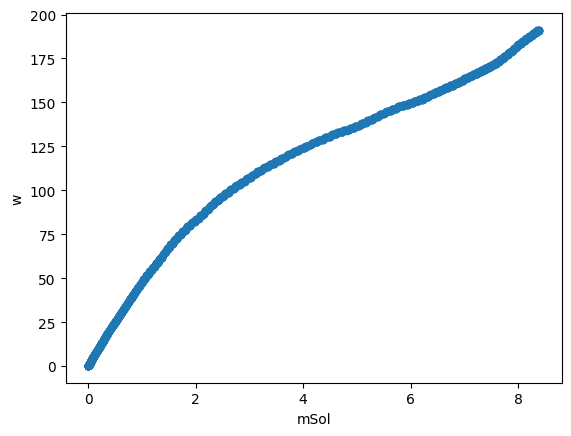

In [7]:
observed_data.plot.scatter("mSol", "w")